In [0]:
# This file has the modeling phase.
# We read the pickle files that we created in the feature engineering phase
# Then we merge them to create a big trainset
# Finally, we use DecisionTreeRegressor to create the model and we save it.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
# https://www.kaggle.com/marklvl/decision-tree-regressor-on-bike-sharing-dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from math import sqrt

# print non truncated column info in pandas dataframe
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# read train set
# df = pd.read_pickle(r'C:\Users\Dimos\Desktop\MSc\Semester 4\NLP\Coursework\trainsets\df_train_ptstkwat.pkl')
# read the extra similarities
# df_similarities = pd.read_pickle(r'C:\Users\Dimos\Desktop\MSc\Semester 4\NLP\Coursework\trainsets\df_similarities.pkl')
# read the fuzzy features
# df_fuzzy = pd.read_pickle(r'C:\Users\Dimos\Desktop\MSc\Semester 4\NLP\Coursework\trainsets\df_fuzzy.pkl')

In [0]:
# merge the main trainset with the extra similarities
df = df.merge(df_similarities, left_on='product_uid', right_on='product_uid', how='left')
# and fuzzy features
df = df.merge(df_fuzzy, left_on='product_uid', right_on='product_uid', how='left')

In [0]:
df.head(2)

,product_uid,N_numerics_PT,N_numerics_ST,N_non_numerics_PT,N_non_numerics_ST,N_common_words_leven,JC_sim,N_substrs_PT_x,N_substrs_PD_x,N_substrs_Atr_x,Perc_substrs_x,N_substrs_PT_y,N_substrs_PD_y,N_substrs_Atr_y,Perc_substrs_y,Leven_sim_ST_PT,N_keywords_leven,relevance,id,JC_sim_PT,Cosine_sim_PT,Leven_sim_PD,JC_sim_PD,Cosine_sim_PD,JC_sim_Atrr,Cosine_sim_Atrr,Leven_sim_Atrr,FZ_PT_1,FZ_PT_2,FZ_PT_3,FZ_PT_4,FZ_Attr_1,FZ_Attr_2,FZ_Attr_3,FZ_Attr_4
0,100001,1,0,3,2,1,0.25,1,1,1,0.5,0,0,0,0.0,0.181818,0,3.0,2,0.142857,0.288675,0.091743,0.014085,0.19696,0.035714,0.138675,0.057143,22,56,39,56,4,8,4,5
1,100001,1,0,3,2,1,0.25,1,1,1,0.5,0,0,0,0.0,0.181818,0,3.0,2,0.142857,0.288675,0.091743,0.014085,0.19696,0.035714,0.138675,0.057143,10,36,10,10,2,11,3,4


In [0]:
df.describe()

,N_numerics_PT,N_numerics_ST,N_non_numerics_PT,N_non_numerics_ST,N_common_words_leven,JC_sim,N_substrs_PT_x,N_substrs_PD_x,N_substrs_Atr_x,Perc_substrs_x,N_substrs_PT_y,N_substrs_PD_y,N_substrs_Atr_y,Perc_substrs_y,Leven_sim_ST_PT,N_keywords_leven,relevance,id,JC_sim_PT,Cosine_sim_PT,Leven_sim_PD,JC_sim_PD,Cosine_sim_PD,JC_sim_Atrr,Cosine_sim_Atrr,Leven_sim_Atrr,FZ_PT_1,FZ_PT_2,FZ_PT_3,FZ_PT_4,FZ_Attr_1,FZ_Attr_2,FZ_Attr_3,FZ_Attr_4
count,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000,493167.000000
mean,2.094246,0.342659,10.115928,2.890573,1.262706,0.122597,1.463476,1.732725,1.508637,0.645747,0.135506,0.118432,0.145182,0.129463,0.211748,0.125215,2.337603,57724.239913,0.138631,0.284281,0.119365,0.024515,0.189017,0.031954,0.112585,0.081117,29.114766,59.712310,32.076956,57.275440,5.780166,36.889173,6.427954,51.577867
std,1.405846,0.609008,3.569996,1.244862,1.071739,0.111366,1.169307,1.215068,1.235852,0.322201,0.399043,0.372129,0.422171,0.326842,0.094596,0.376619,0.533683,54209.100262,0.107889,0.192605,0.042761,0.020293,0.142630,0.036065,0.126037,0.043350,12.162054,17.856374,12.748446,27.154612,4.383394,16.547333,4.602803,32.590739
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.148148,0.000000,2.000000,14014.000000,0.066667,0.158114,0.090909,0.011870,0.072739,0.000000,0.000000,0.053241,21.000000,47.000000,23.000000,34.000000,3.000000,26.000000,3.000000,17.000000
50%,2.000000,0.000000,9.000000,3.000000,1.000000,0.111111,1.000000,2.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.196721,0.000000,2.330000,39353.000000,0.125000,0.288675,0.118881,0.020747,0.177123,0.026316,0.091287,0.078788,28.000000,59.000000,31.000000,58.000000,5.000000,34.000000,5.000000,56.000000
75%,3.000000,1.000000,12.000000,4.000000,2.000000,0.181818,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,2.670000,88167.500000,0.200000,0.424264,0.147059,0.033333,0.283069,0.050000,0.182574,0.106280,36.000000,71.000000,40.000000,79.000000,7.000000,45.000000,8.000000,78.000000
max,9.000000,5.000000,28.000000,34.000000,9.000000,1.000000,33.000000,33.000000,33.000000,1.000000,4.000000,3.000000,3.000000,1.000000,1.000000,4.000000,3.000000,221473.000000,1.000000,1.000000,0.354839,0.258065,0.846099,0.461538,0.829228,0.395349,100.000000,100.000000,100.000000,100.000000,67.000000,100.000000,67.000000,100.000000


C:\Users\Dimos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


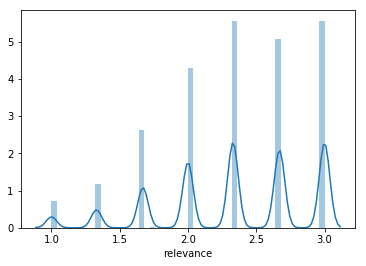

In [0]:
sns.distplot(df['relevance'])

In [0]:
df.corr()

,N_numerics_PT,N_numerics_ST,N_non_numerics_PT,N_non_numerics_ST,N_common_words_leven,JC_sim,N_substrs_PT_x,N_substrs_PD_x,N_substrs_Atr_x,Perc_substrs_x,N_substrs_PT_y,N_substrs_PD_y,N_substrs_Atr_y,Perc_substrs_y,Leven_sim_ST_PT,N_keywords_leven,relevance,id,JC_sim_PT,Cosine_sim_PT,Leven_sim_PD,JC_sim_PD,Cosine_sim_PD,JC_sim_Atrr,Cosine_sim_Atrr,Leven_sim_Atrr,FZ_PT_1,FZ_PT_2,FZ_PT_3,FZ_PT_4,FZ_Attr_1,FZ_Attr_2,FZ_Attr_3,FZ_Attr_4
N_numerics_PT,1.000000,0.292090,0.417915,-0.151783,-0.187342,-0.231899,-0.117078,-0.122294,-0.109942,-0.062822,0.165002,0.115454,0.173951,0.149923,-0.284806,-0.075296,-0.052312,-0.176458,-0.231332,-0.199213,-0.146819,-0.118475,-0.127589,-0.062242,-0.092947,-0.062115,-0.329339,-0.126761,-0.291581,-0.092594,-0.099512,-0.019487,-0.093415,-0.061604
N_numerics_ST,0.292090,1.000000,0.042263,-0.145334,-0.076981,-0.048181,0.026348,-0.032063,-0.023785,0.044517,0.667630,0.605106,0.680772,0.606617,-0.021855,-0.068328,-0.072115,-0.035885,0.016794,-0.051697,-0.132532,0.008645,-0.090087,-0.002185,-0.065720,-0.044762,-0.061417,-0.078670,-0.044941,-0.012668,-0.057228,0.022360,-0.043040,-0.029719
N_non_numerics_PT,0.417915,0.042263,1.000000,0.063129,0.173366,-0.134031,0.136422,0.055631,0.063578,0.043962,0.016659,-0.008235,0.031896,0.028817,-0.329945,-0.074165,-0.008819,-0.029559,-0.143272,-0.036742,0.017609,-0.105172,-0.031776,0.004443,0.022357,-0.024798,-0.349228,0.033069,-0.321185,0.069106,-0.127756,0.000415,-0.133704,0.049994
N_non_numerics_ST,-0.151783,-0.145334,0.063129,1.000000,0.469430,0.318657,0.589220,0.686523,0.638727,0.109010,-0.023064,-0.022847,-0.037908,-0.046890,0.468662,0.020515,-0.002648,0.117077,0.159169,0.158482,0.273290,0.138631,0.146454,0.125988,0.131034,0.194011,0.176810,-0.003611,0.212217,0.089722,0.028522,0.007181,0.052001,0.125028
N_common_words_leven,-0.187342,-0.076981,0.173366,0.469430,1.000000,0.886295,0.807582,0.589322,0.518691,0.463990,-0.010473,-0.022873,-0.037495,-0.033837,0.489727,0.140206,0.253692,0.210951,0.365641,0.399762,0.222673,0.214173,0.260343,0.159202,0.171558,0.108959,0.271998,0.270374,0.293372,0.370154,0.083739,0.036147,0.092373,0.191758
JC_sim,-0.231899,-0.048181,-0.134031,0.318657,0.886295,1.000000,0.695479,0.484516,0.402581,0.456262,0.004417,-0.008720,-0.023889,-0.028678,0.599813,0.196304,0.270907,0.212744,0.430771,0.415226,0.181248,0.248347,0.257514,0.142627,0.143890,0.091496,0.387010,0.272757,0.396635,0.346986,0.141447,0.044693,0.148964,0.151623
N_substrs_PT_x,-0.117078,0.026348,0.136422,0.589220,0.807582,0.695479,1.000000,0.756906,0.661541,0.553095,0.067207,0.051124,0.044628,0.036093,0.507555,0.099393,0.220113,0.188166,0.345267,0.365761,0.192517,0.207483,0.225026,0.150226,0.150785,0.094082,0.247450,0.224547,0.276390,0.354273,0.064585,0.035414,0.075384,0.187213
N_substrs_PD_x,-0.122294,-0.032063,0.055631,0.686523,0.589322,0.484516,0.756906,1.000000,0.781075,0.606243,0.031429,0.040287,0.016782,-0.000462,0.434777,0.106778,0.174206,0.115967,0.241952,0.259778,0.195791,0.239426,0.293677,0.185813,0.205866,0.103617,0.199939,0.112517,0.228990,0.217297,0.021749,0.042844,0.033823,0.218412
N_substrs_Atr_x,-0.109942,-0.023785,0.063578,0.638727,0.518691,0.402581,0.661541,0.781075,1.000000,0.500347,0.025403,0.033584,0.050143,-0.001649,0.351323,0.019977,0.125412,0.031805,0.161965,0.179661,0.167298,0.120218,0.212137,0.274558,0.301286,0.200261,0.142296,0.047631,0.168781,0.145917,-0.131240,0.049151,-0.099818,0.388185
Perc_substrs_x,-0.062822,0.044517,0.043962,0.109010,0.463990,0.456262,0.553095,0.606243,0.500347,1.000000,0.037175,0.028858,0.013383,0.033478,0.245914,0.131450,0.272111,0.118034,0.231496,0.276612,0.063312,0.174057,0.232053,0.122279,0.143432,0.003234,0.147753,0.207586,0.156712,0.290676,0.069282,0.049726,0.067257,0.202385


In [0]:
df.columns

Index(['product_uid', 'N_numerics_PT', 'N_numerics_ST', 'N_non_numerics_PT',
       'N_non_numerics_ST', 'N_common_words_leven', 'JC_sim', 'N_substrs_PT_x',
       'N_substrs_PD_x', 'N_substrs_Atr_x', 'Perc_substrs_x', 'N_substrs_PT_y',
       'N_substrs_PD_y', 'N_substrs_Atr_y', 'Perc_substrs_y',
       'Leven_sim_ST_PT', 'N_keywords_leven', 'relevance', 'id', 'JC_sim_PT',
       'Cosine_sim_PT', 'Leven_sim_PD', 'JC_sim_PD', 'Cosine_sim_PD',
       'JC_sim_Atrr', 'Cosine_sim_Atrr', 'Leven_sim_Atrr', 'FZ_PT_1',
       'FZ_PT_2', 'FZ_PT_3', 'FZ_PT_4', 'FZ_Attr_1', 'FZ_Attr_2', 'FZ_Attr_3',
       'FZ_Attr_4'],
      dtype='object')

In [0]:
X = df[['id', 'product_uid', 'N_numerics_PT', 'N_numerics_ST', 'N_non_numerics_PT',
       'N_non_numerics_ST', 'N_common_words_leven', 'JC_sim', 'N_substrs_PT_x',
       'N_substrs_PD_x', 'N_substrs_Atr_x', 'Perc_substrs_x', 'N_substrs_PT_y',
       'N_substrs_PD_y', 'N_substrs_Atr_y', 'Perc_substrs_y',
       'Leven_sim_ST_PT', 'N_keywords_leven', 'JC_sim_PT',
       'Cosine_sim_PT', 'Leven_sim_PD', 'JC_sim_PD', 'Cosine_sim_PD',
       'JC_sim_Atrr', 'Cosine_sim_Atrr', 'Leven_sim_Atrr', 'FZ_PT_1',
       'FZ_PT_2', 'FZ_PT_3', 'FZ_PT_4', 'FZ_Attr_1', 'FZ_Attr_2', 'FZ_Attr_3',
       'FZ_Attr_4']]


y = df['relevance']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [0]:
X_train.head(1)

,id,product_uid,N_numerics_PT,N_numerics_ST,N_non_numerics_PT,N_non_numerics_ST,N_common_words_leven,JC_sim,N_substrs_PT_x,N_substrs_PD_x,N_substrs_Atr_x,Perc_substrs_x,N_substrs_PT_y,N_substrs_PD_y,N_substrs_Atr_y,Perc_substrs_y,Leven_sim_ST_PT,N_keywords_leven,JC_sim_PT,Cosine_sim_PT,Leven_sim_PD,JC_sim_PD,Cosine_sim_PD,JC_sim_Atrr,Cosine_sim_Atrr,Leven_sim_Atrr,FZ_PT_1,FZ_PT_2,FZ_PT_3,FZ_PT_4,FZ_Attr_1,FZ_Attr_2,FZ_Attr_3,FZ_Attr_4
156897,17448,103079,0,0,10,3,1,0.090909,1,2,1,0.666667,0,0,0,0.0,0.285714,0,0.111111,0.213201,0.084615,0.012658,0.048679,0.0,0.0,0.062147,41,45,27,42,7,45,8,81


In [0]:
X_test.head(1)

,id,product_uid,N_numerics_PT,N_numerics_ST,N_non_numerics_PT,N_non_numerics_ST,N_common_words_leven,JC_sim,N_substrs_PT_x,N_substrs_PD_x,N_substrs_Atr_x,Perc_substrs_x,N_substrs_PT_y,N_substrs_PD_y,N_substrs_Atr_y,Perc_substrs_y,Leven_sim_ST_PT,N_keywords_leven,JC_sim_PT,Cosine_sim_PT,Leven_sim_PD,JC_sim_PD,Cosine_sim_PD,JC_sim_Atrr,Cosine_sim_Atrr,Leven_sim_Atrr,FZ_PT_1,FZ_PT_2,FZ_PT_3,FZ_PT_4,FZ_Attr_1,FZ_Attr_2,FZ_Attr_3,FZ_Attr_4
41110,5145,100898,5,0,13,3,0,0.0,0,1,1,0.333333,0,0,0,0.0,0.246377,0,0.0,0.0,0.079545,0.0,0.0,0.0,0.0,0.043716,16,50,24,50,6,44,4,29


In [0]:
print(X_train.shape, X_test.shape)

(394533, 34) (98634, 34)


### - DecisionTreeRegressor

In [0]:
#DT = DecisionTreeRegressor(criterion='mse', max_depth=100, max_leaf_nodes=1000, min_samples_leaf=10, min_samples_split=17)
DT = DecisionTreeRegressor(criterion='mse', max_depth=100, max_leaf_nodes=250, min_samples_leaf=10, min_samples_split=17)

DT.fit(X_train, y_train)
print("R-Squared on train dataset={}".format(DT.score(X_train, y_train)))

#TR.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(DT.score(X_test,y_test)))

R-Squared on train dataset=0.3172473120626711
R-Squared on test dataset=0.31641610966232525


In [0]:
predictions_test = DT.predict(X_test)
predictions_train = DT.predict(X_train)

rms_train = sqrt(mean_squared_error(y_train, predictions_train))
print('RMSE - train = ', rms_train)
rms_test = sqrt(mean_squared_error(y_test, predictions_test))
print('RMSE - test = ', rms_test)

RMSE - train =  0.4410100897260128
RMSE - test =  0.4411059639157436


### - GridSearchCV - DecisionTreeRegressor

In [0]:
param_grid = {"criterion": ["mse"],
               "min_samples_split": [13, 17],
               "max_depth": [80, 100],
               "min_samples_leaf": [10, 15],
               "max_leaf_nodes": [200, 250],
              }

grid_cv_DT = GridSearchCV(DT, param_grid, cv=10)

grid_cv_DT.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=250, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=17, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse'], 'min_samples_split': [13, 17], 'max_depth': [80, 100], 'min_samples_leaf': [10, 15], 'max_leaf_nodes': [200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("R-Squared::{}".format(grid_cv_DT.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DT.best_params_))

R-Squared::0.3127150301163177
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 80, 'max_leaf_nodes': 250, 'min_samples_leaf': 15, 'min_samples_split': 13}


In [0]:
{grid_cv_DT.best_score_: grid_cv_DT.best_estimator_}

{0.3127150301163177: DecisionTreeRegressor(criterion='mse', max_depth=80, max_features=None,
            max_leaf_nodes=250, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=15,
            min_samples_split=13, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')}

In [0]:
model_DT = grid_cv_DT.best_estimator_

In [0]:
model_DT.fit(X_train, y_train)
print("R-Squared on train dataset={}".format(model_DT.score(X_train, y_train)))

print("R-Squared on test dataset={}".format(model_DT.score(X_test,y_test)))

R-Squared on train dataset=0.31724731206267087
R-Squared on test dataset=0.31642472041878345


In [0]:
predictions_test = model_DT.predict(X_test)
predictions_train = model_DT.predict(X_train)

rms_train = sqrt(mean_squared_error(y_train, predictions_train))
print('RMSE - train = ', rms_train)
rms_test = sqrt(mean_squared_error(y_test, predictions_test))
print('RMSE - test = ', rms_test)

RMSE - train =  0.44101008972601285
RMSE - test =  0.44110318571394386


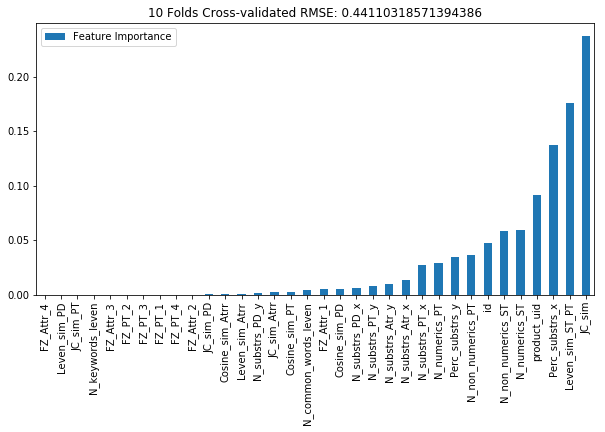

In [0]:
summary = pd.DataFrame(model_DT.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
ax = plt.gca()
summary.sort_values('Feature Importance').plot.bar(ax=ax, title='10 Folds Cross-validated RMSE: {0}'.format(rms_test), figsize=(10,5))

In [0]:
import pickle

In [0]:
# save model to disk
filename = 'models/model_DT.sav'
pickle.dump(model_DT, open(filename, 'wb'))

# load saved model
#filename = 'models/model_DT.sav'
#loaded_model = pickle.load(open(filename, 'rb'))